In [114]:
# import libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.callbacks import EarlyStopping

In [115]:
# importing data

df = pd.read_csv('diamonds.csv',index_col=0)
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [116]:
# splitting data into X and y
X = df.drop('price',axis=1)
y = df['price']


In [117]:
# encoding categorical data into numerical data

le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])


In [118]:
#splitting data into train and test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [119]:
# standardizing data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [120]:
# creating neural network


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(256,activation='relu',input_shape=(9,)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(1))


In [121]:
model.compile(optimizer='adam',loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10,restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=35, callbacks=[early_stop],validation_split=0.2)


Epoch 1/35
1079/1079 [==============================] - 3s 2ms/step - loss: 9719922.0000 - val_loss: 1681965.3750
Epoch 2/35
1079/1079 [==============================] - 2s 2ms/step - loss: 1758667.5000 - val_loss: 1530054.3750
Epoch 3/35
1079/1079 [==============================] - 3s 2ms/step - loss: 1658246.8750 - val_loss: 1561501.7500
Epoch 4/35
1079/1079 [==============================] - 2s 2ms/step - loss: 1601838.1250 - val_loss: 1435689.3750
Epoch 5/35
1079/1079 [==============================] - 2s 2ms/step - loss: 1554560.1250 - val_loss: 1393829.0000
Epoch 6/35
1079/1079 [==============================] - 2s 2ms/step - loss: 1515402.8750 - val_loss: 1363218.5000
Epoch 7/35
1079/1079 [==============================] - 2s 2ms/step - loss: 1474767.8750 - val_loss: 1331834.7500
Epoch 8/35
1079/1079 [==============================] - 2s 2ms/step - loss: 1442684.1250 - val_loss: 1303708.6250
Epoch 9/35
1079/1079 [==============================] - 2s 2ms/step - loss: 1418039.6250

In [122]:
loss = model.evaluate(X_test,y_test)
print(f'the loss is {loss}')

338/338 [==============================] - 1s 2ms/step - loss: 1177794.8750
the loss is 1177794.875


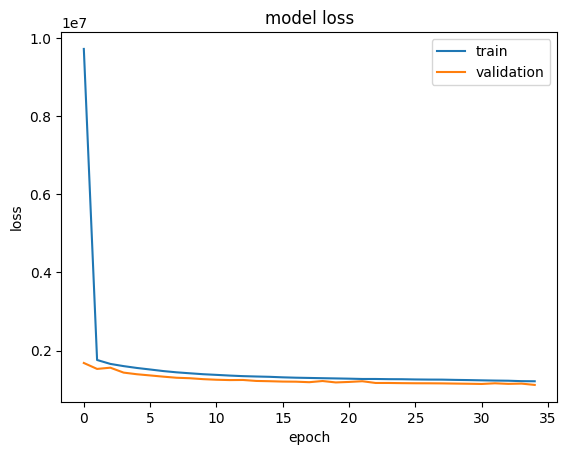

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper right')

